In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
path_to_data = "data/imclef07d/imclef07d_train.csv"
path_to_data_hf = "data/imclef07d/imclef07d.hf"

In [4]:
g = nx.DiGraph()
with open(path_to_data_hf, "r") as f:
    for line in f:
        v1, v2 = line.replace('\n', '').split(' ')
        g.add_edge(v1, v2)

In [17]:
nx.tree_data(g, '19')

{'id': '19',
 'children': [{'id': '15',
   'children': [{'id': '16',
     'children': [{'id': '1D'},
      {'id': '1F'},
      {'id': '22'},
      {'id': '23'},
      {'id': '2A'}]},
    {'id': 'D',
     'children': [{'id': 'E'}, {'id': 'F'}, {'id': '13'}, {'id': '2B'}]}]},
  {'id': '1A',
   'children': [{'id': '1B', 'children': [{'id': '1E'}]},
    {'id': '1C', 'children': [{'id': '2D'}]}]},
  {'id': '2',
   'children': [{'id': '3', 'children': [{'id': '4'}]},
    {'id': '7', 'children': [{'id': '8'}]},
    {'id': 'A', 'children': [{'id': '26'}, {'id': '27'}]},
    {'id': '5', 'children': [{'id': '6'}, {'id': '9'}, {'id': 'C'}]},
    {'id': 'B', 'children': [{'id': '2C'}]}]},
  {'id': '10',
   'children': [{'id': '11', 'children': [{'id': '20'}]},
    {'id': '12', 'children': [{'id': '2E'}]},
    {'id': '14', 'children': [{'id': '29'}]},
    {'id': '17', 'children': [{'id': '28'}]},
    {'id': '18', 'children': [{'id': '21'}]},
    {'id': '0', 'children': [{'id': '1'}]},
    {'id': '2

In [45]:
tree_data = nx.tree_data(g, '19')
class_hierarchy = {}

def print_children(tree_data):
    node_id = None
    for key, value in tree_data.items():
        if key == 'id':
            node_id = value
            class_hierarchy[node_id] = []
        if key == 'children':
            for node  in value:
                class_hierarchy[node_id].append(node["id"])
                print_children(node)
    for key, item in class_hierarchy.copy().items():
        if len(item) == 0:
            class_hierarchy.pop(key)

print_children(tree_data)
class_hierarchy

{'19': ['15', '1A', '2', '10'],
 '15': ['16', 'D'],
 '16': ['1D', '1F', '22', '23', '2A'],
 'D': ['E', 'F', '13', '2B'],
 '1A': ['1B', '1C'],
 '1B': ['1E'],
 '1C': ['2D'],
 '2': ['3', '7', 'A', '5', 'B'],
 '3': ['4'],
 '7': ['8'],
 'A': ['26', '27'],
 '5': ['6', '9', 'C'],
 'B': ['2C'],
 '10': ['11', '12', '14', '17', '18', '0', '24'],
 '11': ['20'],
 '12': ['2E'],
 '14': ['29'],
 '17': ['28'],
 '18': ['21'],
 '0': ['1'],
 '24': ['25']}

In [49]:
with open('data/imclef07d/class_hierarchy.json', 'w') as f:
    json.dump(class_hierarchy, f)

/home/edzia/PWr/venv/lib/python3.6/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


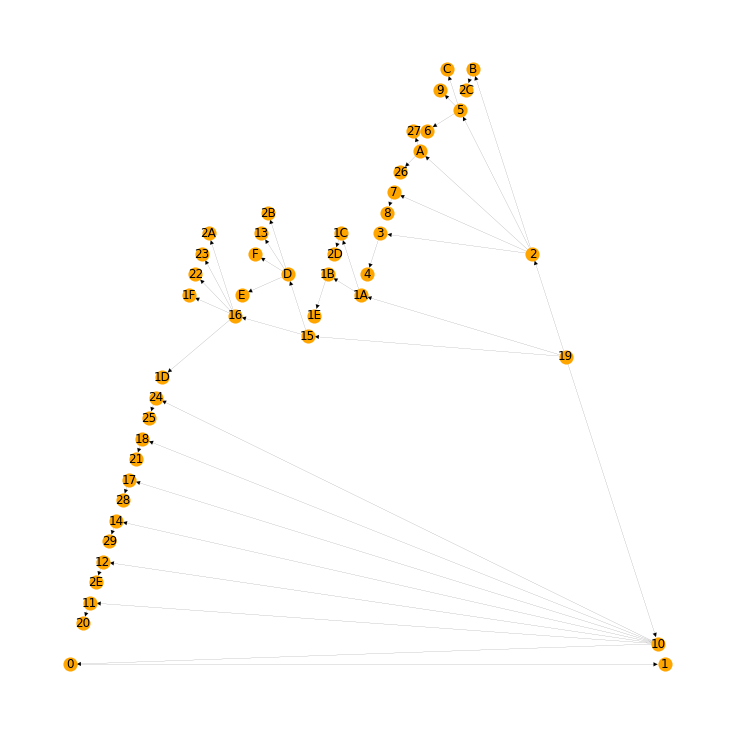

In [5]:
options = {
    'node_color': 'orange',
    'node_size': 200,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
plt.figure(figsize=(10,10))
pos = nx.planar_layout(g)
# pos = nx.kamada_kawai_layout(g)
nx.draw(g, pos, with_labels=True, **options)


In [57]:
# code to change this weird format to df
# df = pd.DataFrame()
# with open(path_to_data, "r") as f:
#     for line in f:
#         row = {}
#         values = line.replace('\n', '').split(' ')
#         row['labels'] = values[0]
#         values_string = ','.join(values[1:])
#         values_string = f'row.update({{{values_string}}})'
#         exec(values_string)
#         df = df.append(row, ignore_index=True)

In [69]:
df = pd.read_csv(path_to_data)

In [70]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,labels
0,0,0.596529,-0.284171,0.254657,-0.162900,-0.007383,0.009371,-0.024586,-0.132000,-0.487257,...,0.210829,0.523171,0.275814,0.708057,0.174729,0.007300,0.440557,-0.407543,0.166243,"15,D,2B"
1,1,0.025100,0.001543,0.397514,0.122814,-0.007383,-0.133486,0.403986,0.010857,0.084171,...,0.353686,0.380314,0.275814,0.422343,0.317586,-0.135557,0.154843,0.592457,0.166243,"15,D,2B"
2,2,-0.260614,0.001543,0.540371,0.408529,-0.007383,0.009371,0.118271,0.010857,0.084171,...,0.210829,0.237457,0.418671,0.422343,0.174729,0.007300,0.583414,0.306743,0.023386,"15,D,2B"
3,3,-0.403471,-0.284171,0.111800,-0.162900,0.159283,-0.133486,-0.024586,-0.132000,0.227029,...,0.210829,0.237457,-0.295614,-0.149086,-0.396700,0.007300,0.726271,-0.121829,0.023386,"15,D,2B"
4,4,0.167957,-0.141314,0.254657,0.122814,-0.007383,-0.419200,0.118271,-0.560571,-0.344400,...,-0.074886,0.380314,0.418671,-0.006229,-0.539557,-0.135557,0.011986,-0.264686,-0.119471,"15,D,2B"


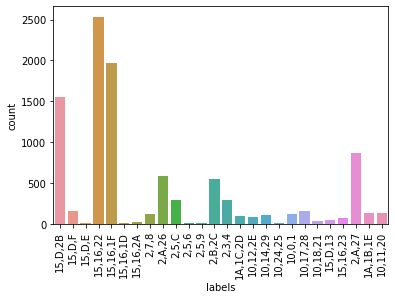

In [79]:
chart = sns.countplot(df['labels'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
pass